# Taller (ejemplos-ejercicios) de Machine learning

En este taller se estudia la técnica de aprendizaje de máquina enfocada en problemas de regresión.



---

Por: Ángela Daniela Córdoba Álvarez


---



In [ ]:
# librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

### Regresión por mínimos cuadrados

En el curso se vio un ejemplo inicial de regresión por mínimos cuadrados en el que se ajustaba un modelo lineal (a una línea recta)  empleando el algoritmo de mínimos cuadrados. Este modelo es óptimo desde el punto de vista de álgebra lineal y a su vez es sencillo y permite ajustar modelos con buena precisión. basta con escoger la forma de una curva apropiada para que el modelo realice un ajuste con poco error.
Como ejemplo de esta situación, es común necesitar modelos regresión muy simples en sistemas con capacidad de cómputo limitado. Tal es el caso de micro-controladores que no tienen tanta potencia para correr modelos grandes, por lo que un modelo de mínimos cuadrados funciona muy bien en casos como la toma de mediciones.

En el ejercicio se obtendrá un modelo que permita explicar los datos de un sensor de temperatura de tipo NTC. Estos sensores han sido ampliamente estudiados y se conoce el modelo de Steinhart-Hart que tiene forma logarítmica y emplea solo tres coeficientes (a, b y c)
**Nota** el modelo de Steinhart-Hart debe emplearse en grados Kélvin

$$ \frac{1}{T} = a + b\times ln(R) + c \times ln^3(R) $$

A partir de los datos, queremos encontrar los parámetros, por medio de la pseudo inversa de Moore Penrose para resolver un problema de la forma $Ax = b$ en donde $A$ es una matriz, $b$ un vector con las mediciones y $x$ el vector con los coeficientes que queremos hallar

$$ A^{-1} = (A^T A)^{-1}\times A^T $$

la solución será

$$ \bar{x} = (A^T A)^{-1}\times A^T \times \bar{b} $$
Esta solución se puede programar directamente usando la multiplicación de matrices de Numpy. También se puede obtener A inversa directamente con la función `np.linalg.pinv()`. El resultado es el mismo

para el ejercicio solo se tienen tres mediciones con esto probaremos cómo se ajusta el modelo a pesar de tener pocos datos, no siempre los modelos más grandes y robustos son la mejor solución para todos los problemas

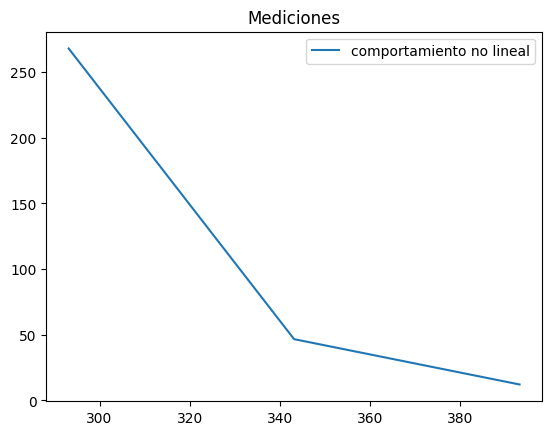

In [ ]:
temperaturas = np.array([20, 70, 120])
medicion_resistencias = ([268.044,46.631,12.114])
# graficando los datos
# preprocesamiento de los datos: convertir a grados Kelvin
temperaturas_kelvin = temperaturas + 273.15
plt.plot(temperaturas_kelvin, medicion_resistencias)
plt.title("Mediciones")
plt.legend(["comportamiento no lineal"])


Crearemos las matrices:


$$
\begin{equation}
A =
\begin{pmatrix}
1 & ln(R_0) & ln^3(R_0)\\
1 & ln(R_1) & ln^3(R_1)\\
1 & ln(R_2) & ln^3(R_2)\\
\end{pmatrix}
\end{equation}
$$


$$
\begin{equation}
b =
\begin{pmatrix}
1/T_0\\
1/T_1\\
1/T_2\\
\end{pmatrix}
\end{equation}
$$


$$
\begin{equation}
x =
\begin{pmatrix}
a\\
b\\
c\\
\end{pmatrix}
\end{equation}
$$

In [ ]:
# creando la matriz A
A = np.ones((len(temperaturas), 3))
# ajustando la segunda columna
A[:,1] = np.log(medicion_resistencias)
# ajustando la tercera columna de la matriz A.
A[:,2] = np.power(np.log(medicion_resistencias), 3)
# ahora el vector b
b = 1 / temperaturas_kelvin
# resolviendo el sistema (calcular la regresión, es decir, los mejores parámetros A, B, C que explican los datos
# dado el modelo descrito
x = np.dot(np.linalg.pinv(A), b)

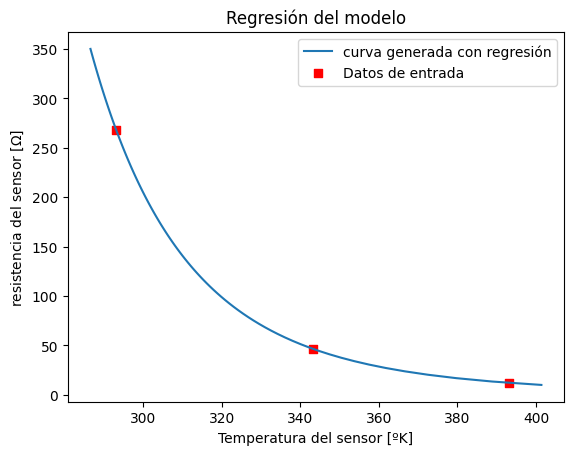

In [ ]:
# Ahora generando una curva con los datos
resistencias_generadas = np.linspace(10, 350, 100) # resistencias generadas
# aplicamos la función con los coeficientes
temp_inversas = x[0] + x[1] * np.log(resistencias_generadas) + x[2] * np.power(np.log(resistencias_generadas), 3)
temperaturas_modelo = 1/ temp_inversas

plt.plot(temperaturas_modelo, resistencias_generadas)
plt.scatter(temperaturas_kelvin, medicion_resistencias, c="r", marker="s")
plt.title("Regresión del modelo")
plt.xlabel("Temperatura del sensor [ºK]")
plt.ylabel("resistencia del sensor ["r"$\Omega$]")
plt.legend(["curva generada con regresión", "Datos de entrada"])

## Tarea(1) en clase/casa:

De acuerdo a lo anterior, consultar el método de regresión logaritmica para verificar que la parte matemática anterior está correcta.

**SOLUCIÓN:**



La regresión logarítmica es un modelo de regresió que, como dice su nombre, incluye un logaritmo.

La forma general de esta regresión es:


> $y=a+b*ln(x)$

donde $y$ es la variable dependiente, $x$ la independiente, $a$ y $b$ los coeficientes de regresión, $ln(x)$ el logaritmo natural de $x$.





El método de mínimos cuadrados ayuda al ajuste de curvas con el menor error posible (es óptimo). Sin embargo, implica el planteamiento de modelos que ayuden a ajustar los datos, es decir, expertos en el tema en el que se quieran hacer las regresiones

# Regresión del dataset Fish Market (mercado de peces):

Este dataset tiene datos asociados a varias especies de peces y sus características. Cuenta con siete especies de peces. En el ejercicio de regresión intentaremos predecir el peso del pez empleando los demás atributos.
Los atributos que cada pez tiene registrados son:
peso, longitud (tres mediciones que se realizan), ancho y alto.
En este caso el modelo hará una regresión empleando varias variables de entrada

Se puede descargar de: https://www.kaggle.com/datasets/vipullrathod/fish-market

In [ ]:
df = pd.read_csv("Fish.csv")
print("Dimensiones del dataset :", df.shape)
df.head()

Dimensiones del dataset : (159, 7)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
# Preprocesando el dataset, vamos a cambiar los nombres para entender mejor las longitudes medidas de los peces
df1 = df.rename(columns={'Length1':'VerticalLen','Length2':'DiagonalLen','Length3':'CrossLen'})
df1.sample(5) # Display random 5 records

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
110,Perch,556.0,32.0,34.5,36.5,10.2565,6.3875
85,Perch,130.0,19.3,21.3,22.8,6.3840,3.5340
78,Perch,78.0,16.8,18.7,19.4,5.1992,3.1234
152,Smelt,9.9,11.3,11.8,13.1,2.2139,1.1659
27,Bream,714.0,32.7,36.0,41.5,16.5170,5.8515


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      159 non-null    object 
 1   Weight       159 non-null    float64
 2   VerticalLen  159 non-null    float64
 3   DiagonalLen  159 non-null    float64
 4   CrossLen     159 non-null    float64
 5   Height       159 non-null    float64
 6   Width        159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


Text(0.5, 1.0, 'Correlation Matrix')

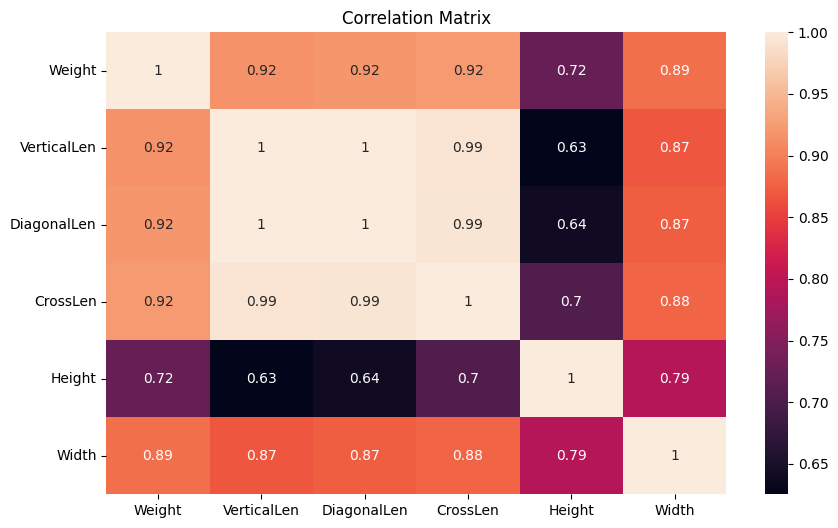

In [ ]:
# y como parte de un análisis, revisaremos la correlación de las variables
df2 = df1.drop("Species", axis=1)
plt.rcParams["figure.figsize"] = (10,6)
sns.heatmap(df2.corr(), annot =True)
plt.title('Correlation Matrix')

Al analizar la correlación, vemos que las variables CrossLen, VerticalLen y DiagonalLen están altamente correlacionadas (su valor de correlación es cercano al 1) por lo que, conservar estas variables puede causar problemas, es decir, el dataset no tendría variables linealmente independientes, lo que es un requisito para crear modelos de regresión.


In [ ]:
# eliminando variables no independientes
df3 = df1.drop(["DiagonalLen", "CrossLen"], axis=1)
df3.head()

,Species,Weight,VerticalLen,Height,Width
0,Bream,242.0,23.2,11.5200,4.0200
1,Bream,290.0,24.0,12.4800,4.3056
2,Bream,340.0,23.9,12.3778,4.6961
3,Bream,363.0,26.3,12.7300,4.4555
4,Bream,430.0,26.5,12.4440,5.1340


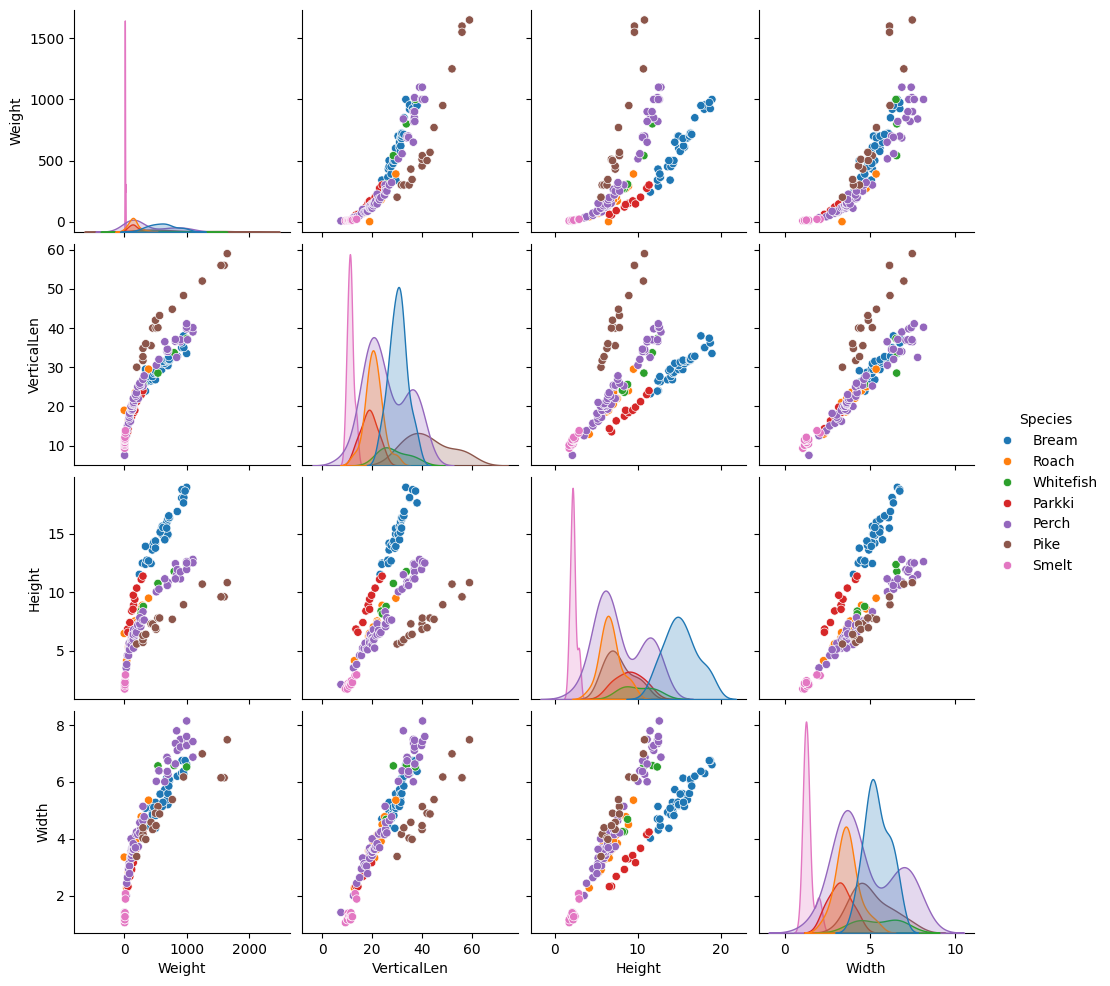

In [ ]:
# visualizando los datos
sns.pairplot(df3, kind= "scatter", hue="Species")
# en el pairplot se puede apreciar que hay ciertas correlaciones entre ancho y alto. Sin embargo, entre diferentes especies hay variaciones.

In [ ]:
# Preprocesando el conjunto de datos
df3.isna().sum() # revisando si hay nulos

Species        0
Weight         0
VerticalLen    0
Height         0
Width          0
dtype: int64

In [ ]:
# Eliminando casos imposibles con la lógica del dataset. Por ejemplo, peces con peso o longitudes que sean cero
df3[df3["Weight"] == 0]
# se debe mostrar una tabla con los eliminados, eliminamos empleando el index

,Species,Weight,VerticalLen,Height,Width
40,Roach,0.0,19.0,6.4752,3.3516


In [ ]:
df3.drop([40])

,Species,Weight,VerticalLen,Height,Width
0,Bream,242.0,23.2,11.5200,4.0200
1,Bream,290.0,24.0,12.4800,4.3056
2,Bream,340.0,23.9,12.3778,4.6961
3,Bream,363.0,26.3,12.7300,4.4555
4,Bream,430.0,26.5,12.4440,5.1340
...,...,...,...,...,...
154,Smelt,12.2,11.5,2.0904,1.3936
155,Smelt,13.4,11.7,2.4300,1.2690
156,Smelt,12.2,12.1,2.2770,1.2558
157,Smelt,19.7,13.2,2.8728,2.0672


In [ ]:
# ya que las especies son un valor categórico, y necesitamos números para entrenar modelos, la mejor alternativa es realizar un "one-hot" encoding, que convierte los nombres de especies (7 especies) en un arreglo de 1x7 donde solo se verá un uno (True) en la columna que corresponda al nombre, en el otro caso se tendrán ceros (False).
especies_codificadas = pd.get_dummies(df3.Species)
especies_codificadas.head()

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False


In [ ]:
# luego creamos un dataframe que contenga toda la información
df4 = pd.concat([df3, especies_codificadas], axis="columns")
df4.head()
# como ya tenemos los nombres codificados, podemos deshacernos de la columna con los nombres y tambien la columna Whitefish
# que no nos sirve para el ejercicio, a Whitefish lo eliminamos porque solo hay 6 muestras, que son insuficientes para el ejercicio de entrenamiento de un modelo.
df5 = df4.drop(["Species", "Whitefish"], axis="columns")
df5.head()

,Weight,VerticalLen,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt
0,242.0,23.2,11.5200,4.0200,True,False,False,False,False,False
1,290.0,24.0,12.4800,4.3056,True,False,False,False,False,False
2,340.0,23.9,12.3778,4.6961,True,False,False,False,False,False
3,363.0,26.3,12.7300,4.4555,True,False,False,False,False,False
4,430.0,26.5,12.4440,5.1340,True,False,False,False,False,False


### Creando un modelo de regresión
Para entrenar el modelo, se requieren datos de entrenamiento y datos de validación. También es necesario separar el dataframe en dos variables que sirvan como datos ($X$) y etiquetas ($y$)

In [ ]:
# X tendrá los datos de entrenamiento
X = df5[["Height", "Width", "VerticalLen", "Bream", "Parkki", "Pike", "Roach", "Smelt"]]
y = df5[["Weight"]]
# particionando
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# validando los resultados
print("Tamaño de X_train=", X_train.shape)
print("Tamaño de X_test=", X_test.shape)
print("Tamaño de y_train=", y_train.shape)
print("Tamaño de y_test=", y_test.shape)

Tamaño de X_train= (127, 8)
Tamaño de X_test= (32, 8)
Tamaño de y_train= (127, 1)
Tamaño de y_test= (32, 1)


### EJEMPLOS DE REGRESIÓN POLINÓMICA:

- **Regresión polinómica (no lineal):**

Como se tienen diferentes especies de peces, la relacion entre características como peso, ancho y alto no es lineal. Por lo tanto, una recta no va a modelar apropiadamente el comportamiento del peso de los peces en función de sus características.
 Crearemos una función para visualizar datos usando un polinomio con varios grados.

Las funciones que permiten trazar varios grados de un polinomio en función de los datos son `np.polyfit()` que funciona mediante mínimos cuadrados para resovler una ecuación polinómica. Esta función requiere suministrar datos (x,y) y el grado del polinomio a ajustar. Polyfit retornará los coeficientes que mejor se ajusten a los datos.



In [ ]:
def polynomial_plot(feature, label):
    # Crear un array de una dimensión para reducir el arreglo de dos dimensiones a una.
    x_coordinates = feature
    y_coordinates = np.squeeze(label)

    # polinomio de primer grado (recta)
    linear_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 1))
    # polinomio de segundo grado (curva parabólica)
    quadratic_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 2))

    # Generar valores para visualizar los datos
    values = np.linspace(x_coordinates.min(), x_coordinates.max(), len(x_coordinates))

    plt.scatter(x_coordinates,y_coordinates, color='blue')
    plt.plot(values, linear_func(values), color='cyan', linestyle='dashed', label='Modelo lineal')
    plt.plot(values, quadratic_func(values), color='red', label='Polinomio cuadrático')
    plt.xlabel('Datos de test de %s '%(feature.name))
    plt.ylabel('Peso del pez')
    plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
    plt.legend()
    plt.title("Comparacion de funciones lineales y cuadráticas para la característica %s" % (feature.name))
    plt.show()

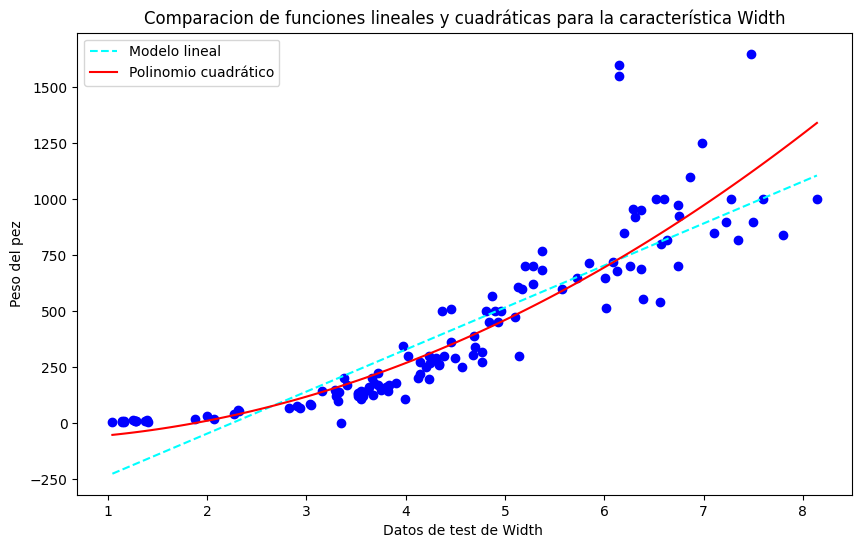

In [ ]:
polynomial_plot(X_train.Width, y_train) # comparando modelos para el ancho y el peso del pez

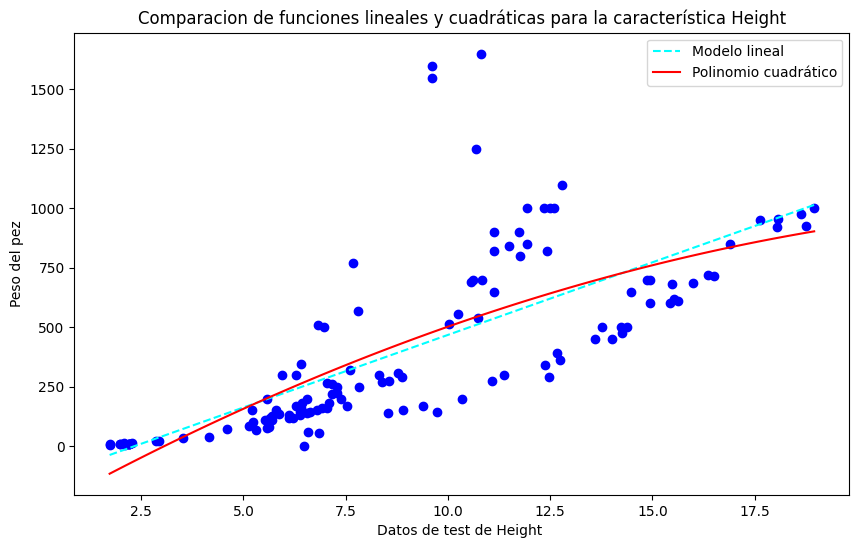

In [ ]:
polynomial_plot(X_train.Height, y_train) # comparando modelos para el alto y el peso del pez

De los gráficos vemos que hay un mejor ajuste del modelo cuadrático al modelo lineal.


### Como ejercicio, graficar polinomios de orden superior, para validar si existen mejores ajustes e incluso ver si se llega al sobre-entrenamiento.

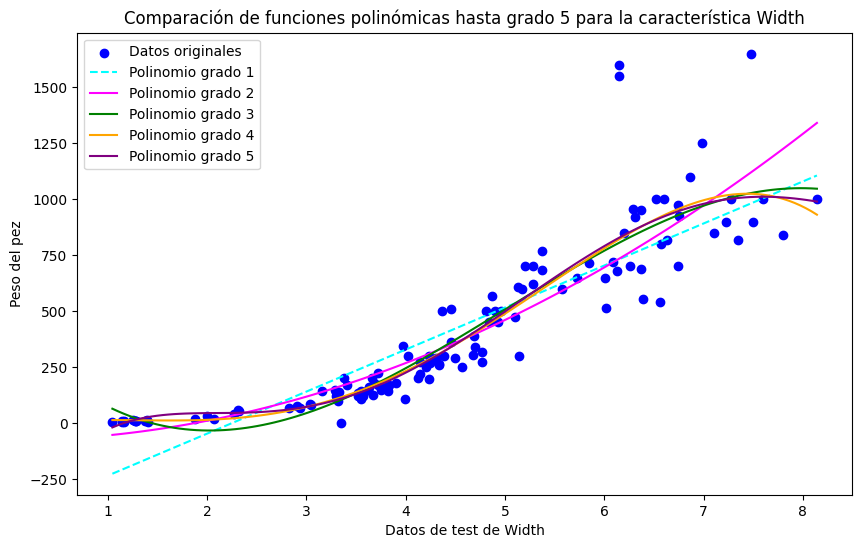

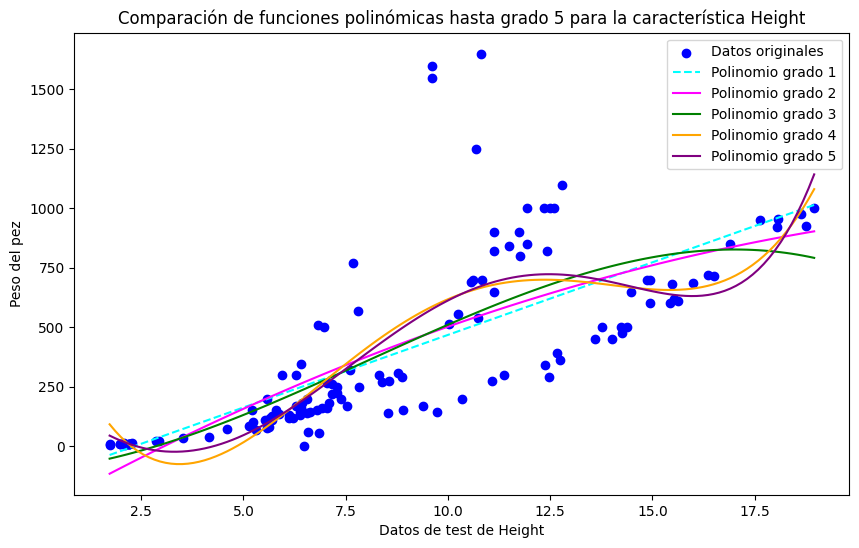

In [ ]:
# Modificamos el código

import numpy as np
import matplotlib.pyplot as plt

def polynomial_plot(feature, label, max_degree=5):
    # Crear un array de una dimensión para reducir el arreglo de dos dimensiones a una.
    x_coordinates = feature
    y_coordinates = np.squeeze(label)

    # Generar valores para visualizar los datos
    values = np.linspace(x_coordinates.min(), x_coordinates.max(), len(x_coordinates))

    plt.scatter(x_coordinates, y_coordinates, color='blue', label='Datos originales')

    # Graficar modelos polinómicos de 1 hasta max_degree
    colors = ['cyan', 'magenta', 'green', 'orange', 'purple']
    for degree in range(1, max_degree + 1):
        poly_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, degree))
        plt.plot(values, poly_func(values), label=f'Polinomio grado {degree}', linestyle='dashed' if degree == 1 else 'solid', color=colors[(degree-1) % len(colors)])

    plt.xlabel(f'Datos de test de {feature.name}')
    plt.ylabel('Peso del pez')
    plt.rcParams["figure.figsize"] = (10,6)  # Custom figure size in inches
    plt.legend()
    plt.title(f'Comparación de funciones polinómicas hasta grado {max_degree} para la característica {feature.name}')
    plt.show()

# Asumiendo que X_train y y_train ya están definidos
polynomial_plot(X_train.Width, y_train, max_degree=5)  # comparando modelos para el ancho y el peso del pez
polynomial_plot(X_train.Height, y_train, max_degree=5)  # comparando modelos para el alto y el peso del pez


Al modificar el código observamos que el parámetro 'max_degree' permite especificar el grado máximo del polinomio (específicamente, en este caso, en 5). Otra modificación relevante el bucle 'for' para los gráficos, lo cual nos permite ajustar y graficar todos los polinomios de grado 1 hasta 'max_degree'.

### Regresión polinómica utilizando Sklearn
Emplearemos un polinomio de grado 2 para realizar la regresión.

In [ ]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)

lm = linear_model.LinearRegression()
lm.fit(X_poly, y_train)

predictions = lm.predict(poly.fit_transform(X_test))
print('r2_score= ', metrics.r2_score(y_test, predictions))


r2_score=  0.9758957144774367


### Entendiendo los resultados del entrenamiento.
Al terminar el entrenamiento, tenemos que el valor de la métrica de R cuadrado indica un buen ajuste.
Lo que podemos hacer es intentar predecir los datos de prueba y validar cómo le va al modelo en comparación con las etiquetas


In [ ]:
predictedWeight = pd.DataFrame(predictions, columns=['Predicted Weight']) # Create new dataframe of column'Predicted Weight'
actualWeight = pd.DataFrame(y_test)
actualWeight = actualWeight.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualWeight,predictedWeight],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Weight,110.000000,120.000000,700.000000,87.000000,390.000000,188.000000,430.000000,242.000000,85.000000,13.400000,...,51.500000,500.000000,145.000000,540.000000,1100.000000,340.000000,950.000000,430.000000,685.000000,575.000000
Predicted Weight,108.898926,98.320801,697.837158,95.620361,433.670166,186.787842,434.258789,314.866943,67.431641,9.570068,...,42.134033,501.167725,126.219482,527.153564,1026.579834,512.668945,923.182129,385.953857,698.479492,617.618896


En la tabla se aprecia que los datos estan cercanos y que no tenemos datos negativos ni ceros. Sin embargo, es mejor graficar y utilizar métricas para evaluar el modelo

Text(0.5, 1.0, 'Comparación del peso generado por el modelo y las etiquetas')

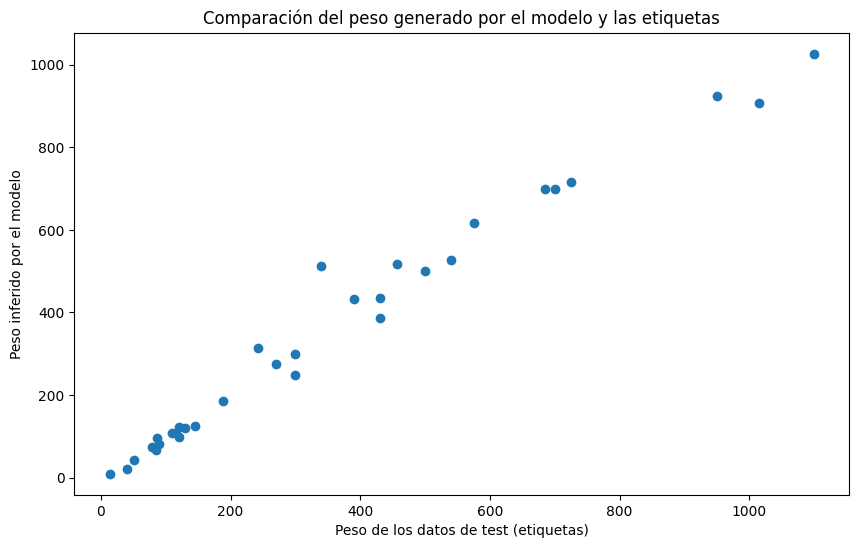

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('Peso de los datos de test (etiquetas)')
plt.ylabel('Peso inferido por el modelo')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Comparación del peso generado por el modelo y las etiquetas")

Text(0.5, 1.0, 'histograma de las diferencias')

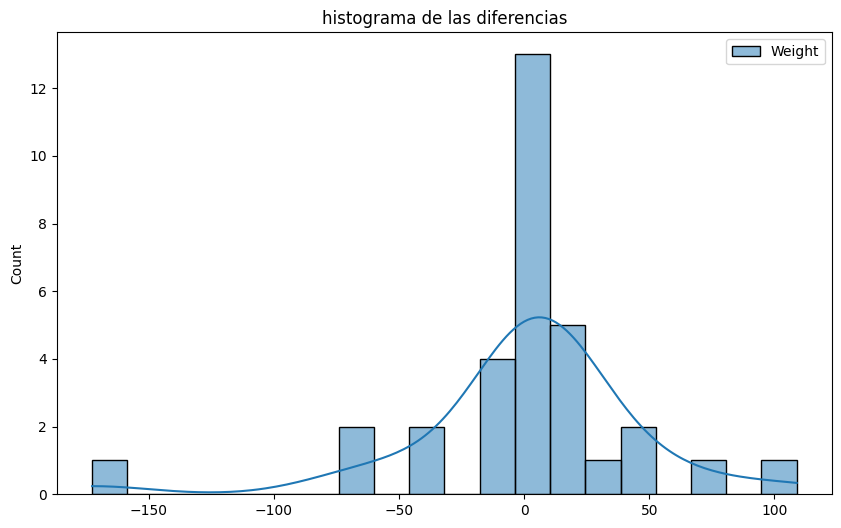

In [ ]:
# Evaluando el modelo con un histograma que grafique la diferencia entre y_test y las predicciones del modelo
sns.histplot(y_test-predictions, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

## Tarea(2) en clase/casa: ver al final en la tarea(3).


- NOTA:

```
residuals = y_test-predictions (diferencias)
```

Si la distribución de los residuals es aproximadamente gasussiana (idealmente de media-->0) implica que sí se está cumpliendo con una de las asumpciones de los modelos de regresión lineal.

*Profundizar más en:

- https://www.dailydoseofds.com/where-did-the-assumptions-of-linear-regression-originate-from/?utm_source=substack&utm_medium=email

- https://blog.dailydoseofds.com/p/statsmodel-regression-summary-will?utm_source=substack&utm_medium=email

### Conclusiones del modelo de regresión

Se puede tener un modelo que tiene una precisión sobre el 90% para calcular el peso de un pez dadas sus medidas (alto, ancho,  longitud). El modelo predice apropiadamente el peso, teniendo en cuenta que son siete especies de peces para los que evaluamos el rendimiento del modelo.
El enfoque de usar un modelo de polinómio de segundo grado funciona para este ejemplo

## Tarea(3) en clase/casa:

De acuerdo a lo anterior, aplicar al mismo dataset (escogido por usted) los 4 métodos de regresión vistos hasta el momento (lineal simple, lineal múltiple, logarítmica, y polinomial). Para la tarea(2): obtener la misma gráfica de la distribución de los "residuals" para cada uno de los 4 modelos.



---


### Dataset nuevo con los 2 métodos de regresión:
> 2. Para realizar esta tarea, haré uso de un dataset proporcionado por la página *kaggle*: https://www.kaggle.com/datasets/darrylljk/worlds-best-universities-qs-rankings-2025/data

In [ ]:
# Importamos las librerías posibles a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
# Cargamos el conjunto de datos y los convertimos a DataFrame

df_ranking = pd.read_csv("qs-world-rankings-2025.csv")
df_ranking.head()

,2025 Rank,2024 Rank,Institution Name,Location,Location Full,Size,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,QS Overall Score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7


In [ ]:
# Columnas con missing values
columnas = ['2025 Rank', '2024 Rank', 'International Faculty', 'International Students', 'International Research Network', 'Sustainability']

# Convertimos esas columnas a valores numéricos
for columna in columnas:
  df_ranking[columna] = pd.to_numeric(df_ranking[columna], errors='coerce')
  df_ranking[columna] = df_ranking[columna].fillna(df_ranking[columna].mean(), inplace=True)

df_ranking.isnull().sum()

2025 Rank                         1503
2024 Rank                         1503
Institution Name                     0
Location                             0
Location Full                        0
Size                                 0
Academic Reputation                  0
Employer Reputation                  0
Faculty Student                      0
Citations per Faculty                0
International Faculty             1503
International Students            1503
International Research Network    1503
Employment Outcomes                  0
Sustainability                    1503
QS Overall Score                     0
dtype: int64

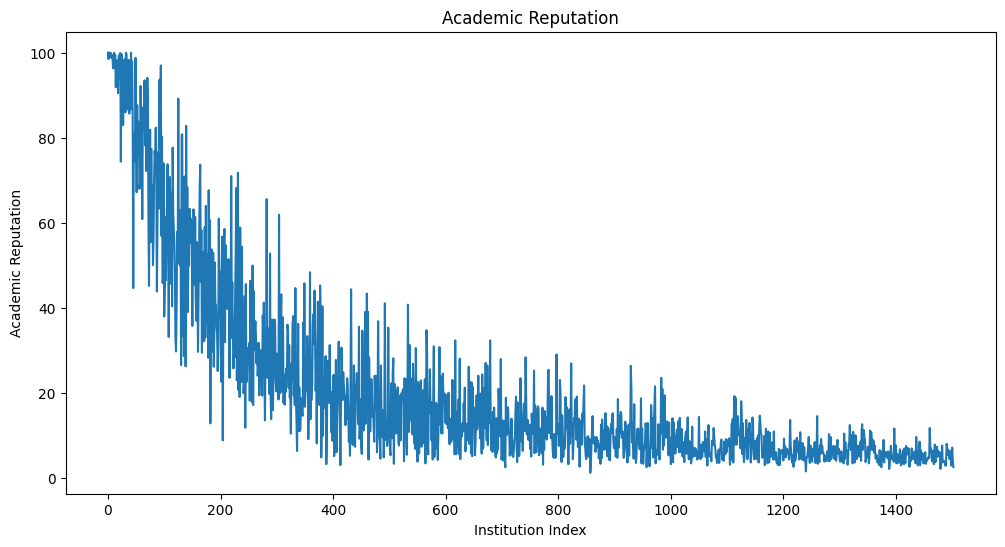

In [ ]:
# En este caso visualizaremos la columna de "Academic Reputation"
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_ranking, x='2025 Rank', y='Academic Reputation')
sns.lineplot(data=df_ranking, x=df_ranking.index, y="Academic Reputation")
plt.title("Academic Reputation")
plt.xlabel("Institution Index")
plt.ylabel("Academic Reputation")
plt.show()

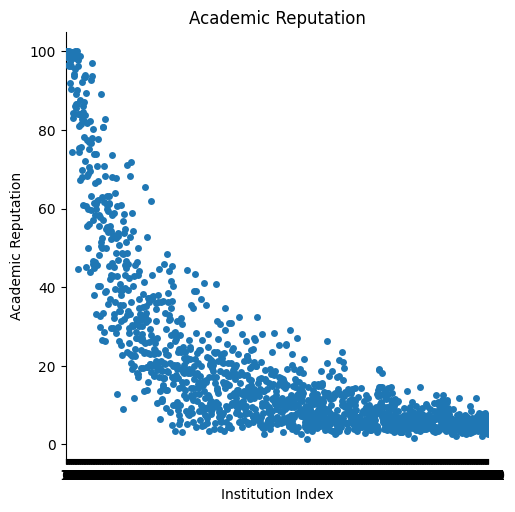

In [ ]:
# Hacemos lo mismo pero con la columna de 'International Students'
sns.catplot(data=df_ranking, x=df_ranking.index, y="Academic Reputation")
plt.title("Academic Reputation")
plt.xlabel("Institution Index")
plt.ylabel("Academic Reputation")
plt.show()

In [ ]:
top = df_ranking.sort_values(by='QS Overall Score', ascending=False).head(5)
top[['Institution Name', 'QS Overall Score', 'Location']]

,Institution Name,QS Overall Score,Location
1,Imperial College London,98.5,UK
2,University of Oxford,96.9,UK
3,Harvard University,96.8,US
4,University of Cambridge,96.7,UK
5,Stanford University,96.1,US


In [ ]:
# Eliminamos las columnas de variables catgóricas para poder hacer la matriz de correlación
no_numericas = df_ranking.select_dtypes(include=['float64'])
matriz = no_numericas.corr()
no_numericas

,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,Employment Outcomes
0,100.0,100.0,100.0,100.0,100.0
1,98.5,99.5,98.2,93.9,93.4
2,100.0,100.0,100.0,84.8,100.0
3,100.0,100.0,96.3,100.0,100.0
4,100.0,100.0,100.0,84.6,100.0
...,...,...,...,...,...
1498,3.0,2.2,10.6,6.1,3.1
1499,5.6,2.2,4.0,1.9,6.2
1500,7.2,9.4,3.3,1.8,9.6
1501,4.1,4.2,7.2,3.9,3.9


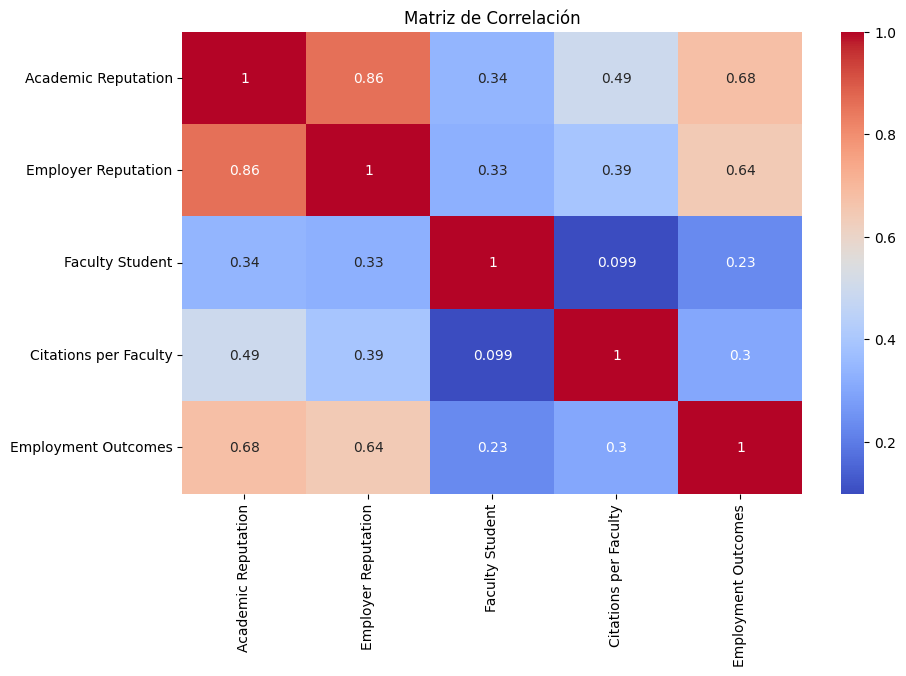

In [ ]:
# Código para regresión lineal
# Importamos la librería necesaria
import pandas as pd

# Cargamos el conjunto de datos
df_ranking = pd.read_csv('qs-world-rankings-2025.csv')

# Reemplazamos los '-' por NaN
df_ranking = df_ranking.replace('-', pd.NA)

# Convertimos las columnas a numéricas
for col in ['Academic Reputation', 'International Faculty', 'International Students', 'International Research Network', 'Sustainability', 'QS Overall Score']:
    df_ranking[col] = pd.to_numeric(df_ranking[col], errors='coerce')

X = df_ranking[['Academic Reputation', 'International Faculty', 'International Students', 'International Research Network', 'Sustainability']]
y = df_ranking['QS Overall Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimimos la gráfica
plt.figure(figsize=(10, 6))
sns.heatmap(matriz, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

#### Haciendo tarea 3 y 2:

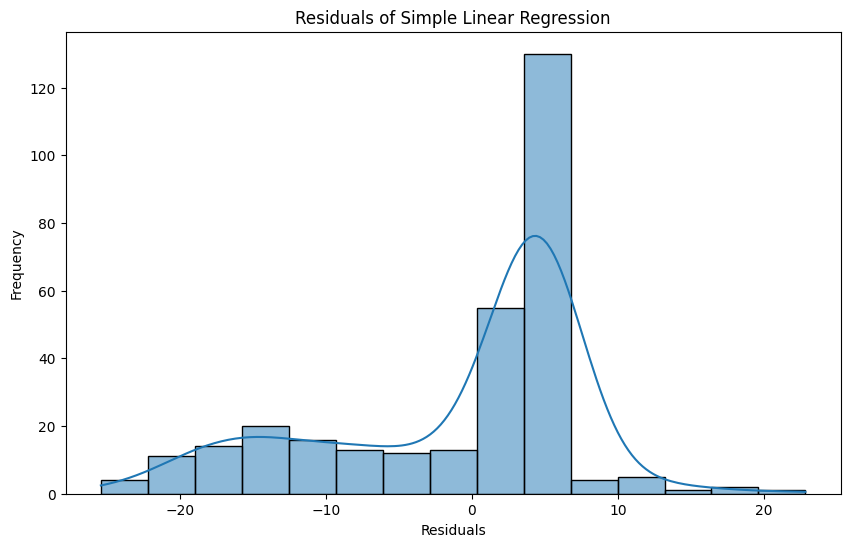

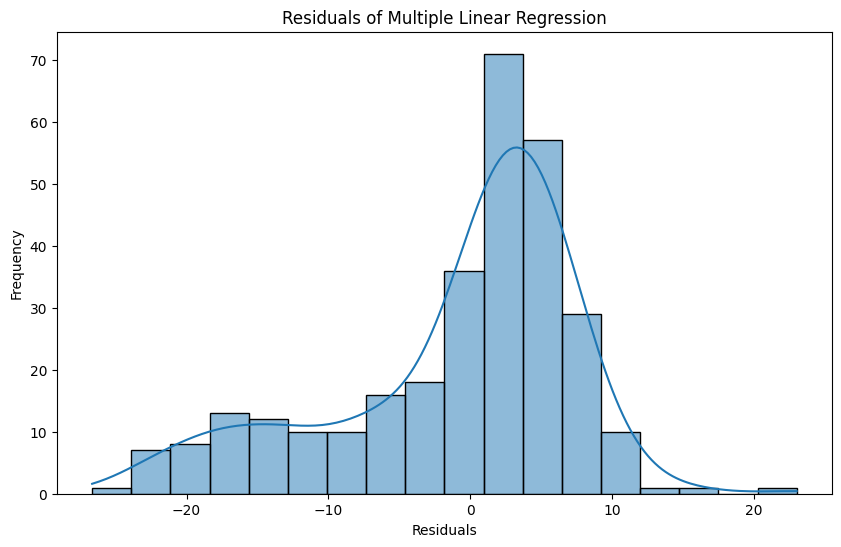

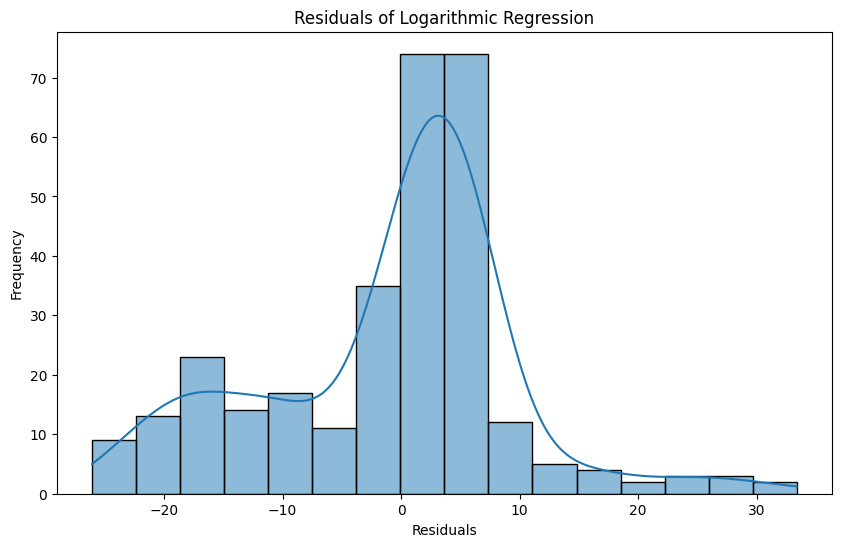

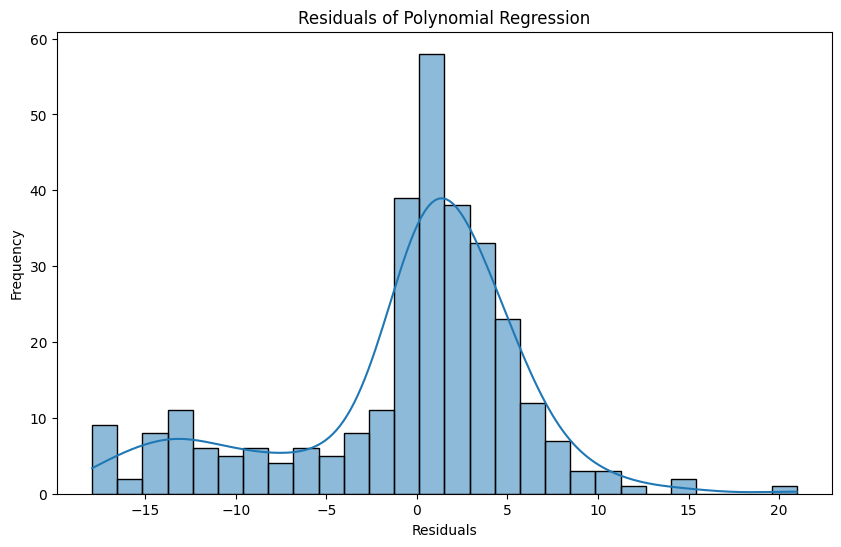

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as metrics

# Cargamos el conjunto de datos y los convertimos a DataFrame
df_ranking = pd.read_csv('qs-world-rankings-2025.csv')

# Reemplazamos los '-' por NaN y convertimos las columnas a valores numéricos
df_ranking = df_ranking.replace('-', np.nan)
columnas = ['2025 Rank', '2024 Rank', 'International Faculty', 'International Students', 'International Research Network', 'Sustainability', 'Academic Reputation', 'QS Overall Score']

for columna in columnas:
    df_ranking[columna] = pd.to_numeric(df_ranking[columna], errors='coerce')
    df_ranking[columna].fillna(df_ranking[columna].mean(), inplace=True)

# Seleccionamos las características y la variable objetivo
X = df_ranking[['Academic Reputation', 'International Faculty', 'International Students', 'International Research Network', 'Sustainability']]
y = df_ranking['QS Overall Score']

# Asegurarse de que la variable objetivo no contenga NaNs
y.fillna(y.mean(), inplace=True)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regresión Lineal Simple
X_train_simple = X_train[['Academic Reputation']]
X_test_simple = X_test[['Academic Reputation']]

linear_model_simple = linear_model.LinearRegression()
linear_model_simple.fit(X_train_simple, y_train)

y_pred_simple = linear_model_simple.predict(X_test_simple)

# Regresión Lineal Múltiple
linear_model_multiple = linear_model.LinearRegression()
linear_model_multiple.fit(X_train, y_train)

y_pred_multiple = linear_model_multiple.predict(X_test)

# Regresión Logarítmica
X_train_log = np.log1p(X_train[['Academic Reputation']])
X_test_log = np.log1p(X_test[['Academic Reputation']])

log_model = linear_model.LinearRegression()
log_model.fit(X_train_log, y_train)

y_pred_log = log_model.predict(X_test_log)

# Regresión Polinomial
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = linear_model.LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)

# Función para graficar los residuales
def plot_residuals(y_test, y_pred, title):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.title(title)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

# Gráficas de los residuales
plot_residuals(y_test, y_pred_simple, 'Residuals of Simple Linear Regression')
plot_residuals(y_test, y_pred_multiple, 'Residuals of Multiple Linear Regression')
plot_residuals(y_test, y_pred_log, 'Residuals of Logarithmic Regression')
plot_residuals(y_test, y_pred_poly, 'Residuals of Polynomial Regression')
